In [1]:
import os
import json

import qiskit
from qiskit.circuit.random import random_circuit
from qiskit_aer import AerSimulator

In [2]:
seed = 44
n_qubits = 4
# n_depth = 20
n_depth = 2
shots = 20480

save_folder = "dataset"
output_name = os.path.join(save_folder, "dataset.json")

In [3]:
if os.path.exists(save_folder):
    print(f"This notebook may overwrite previous results in the {save_folder} directory")
else:
    os.makedirs(save_folder)

This notebook may overwrite previous results in the dataset directory


In [4]:
qc = random_circuit(n_qubits, n_depth, seed=seed, max_operands=2, measure=True)
# qc = qc.decompose()

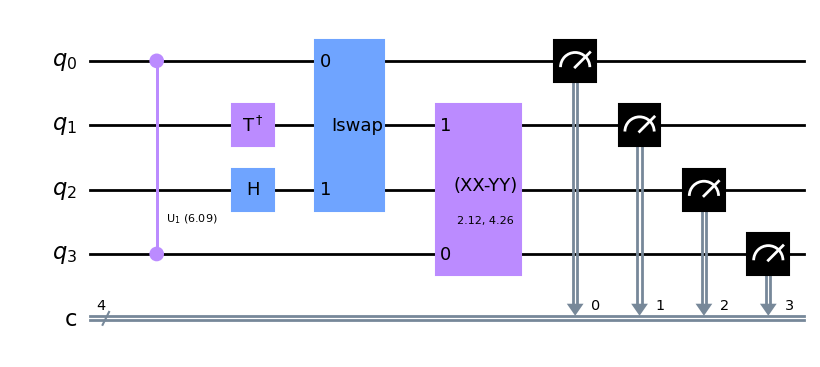

In [5]:
qc.draw(output="mpl", style="clifford")

In [6]:
simulator = AerSimulator()
qct = qiskit.transpile(qc, simulator)

In [7]:
job = simulator.run(qct, shots = shots)
result = job.result()
counts_dict = result.get_counts()

In [8]:
print(counts_dict)

{'0001': 2441, '0000': 2412, '1010': 7825, '1011': 7802}


In [9]:
with open(output_name, 'w') as f:
    json.dump(counts_dict, f)